## Installations needed for Erda to work

In [12]:
pip install -U pip tensorflow tensorboard

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install mediapipe tensorflow plotly

Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt

# Used to create training and testing data
from sklearn.model_selection import train_test_split

# Used for Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten
from tensorflow.keras.callbacks import TensorBoard


# 1. Importing and Splitting Data

In [15]:
X = np.load('../export_data/X_data.npy')
y = np.load('../export_data/y_data.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=6*y.shape[1], stratify=y)

In [16]:
for i in range (y_train.shape[1]):
    print("Number of words in " + str(i) + " category: " + str(np.count_nonzero(y_test[:,i])))

Number of words in 0 category: 7
Number of words in 1 category: 6
Number of words in 2 category: 9
Number of words in 3 category: 8
Number of words in 4 category: 9
Number of words in 5 category: 2
Number of words in 6 category: 4
Number of words in 7 category: 3
Number of words in 8 category: 6


# 2. Neural Network Implementation

### Saving Logs

In [17]:
tracing_logs = TensorBoard(os.path.join('Logs'))

### LSTM Implementation

In [18]:
model = Sequential()
model.add(LSTM(24, return_sequences=True, activation='relu', input_shape=(151,258)))
model.add(Flatten())
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs=100, callbacks=[tracing_logs])

Epoch 1/100
4/4 [==============================] - 2s 77ms/step - loss: 2.1728 - categorical_accuracy: 0.2041
Epoch 2/100
4/4 [==============================] - 0s 73ms/step - loss: 1.9704 - categorical_accuracy: 0.2857
Epoch 3/100
4/4 [==============================] - 0s 72ms/step - loss: 1.8641 - categorical_accuracy: 0.2653
Epoch 4/100
4/4 [==============================] - 0s 70ms/step - loss: 1.6512 - categorical_accuracy: 0.5612
Epoch 5/100
4/4 [==============================] - 0s 70ms/step - loss: 1.5351 - categorical_accuracy: 0.5306
Epoch 6/100
4/4 [==============================] - 0s 74ms/step - loss: 1.4131 - categorical_accuracy: 0.6327
Epoch 7/100
4/4 [==============================] - 0s 78ms/step - loss: 1.2608 - categorical_accuracy: 0.6735
Epoch 8/100
4/4 [==============================] - 0s 84ms/step - loss: 1.1544 - categorical_accuracy: 0.6735
Epoch 9/100
4/4 [==============================] - 0s 86ms/step - loss: 1.0427 - categorical_accuracy: 0.6633
Epoch 10/1

# 3. Visualizing Epoch progress of NN

Train: 0.882


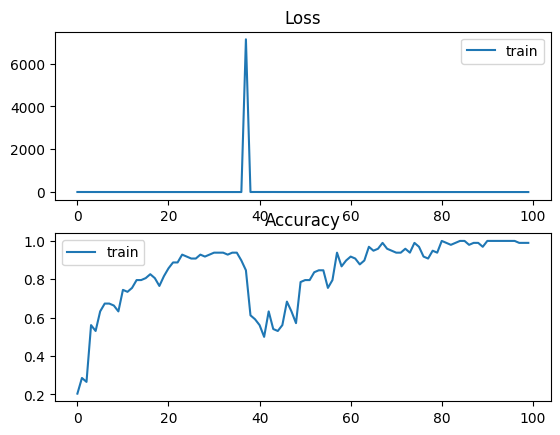

In [20]:
# evaluate the model
_, train_acc = model.evaluate(X, y, verbose=0)
print('Train: %.3f' % (train_acc))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['categorical_accuracy'], label='train')
plt.legend()
plt.show()

# 3. Saving complete NN model

In [21]:
model.save('../export_data/nn_model.h5')
np.save('../export_data/X_test', X_test)
np.save('../export_data/y_test', y_test)